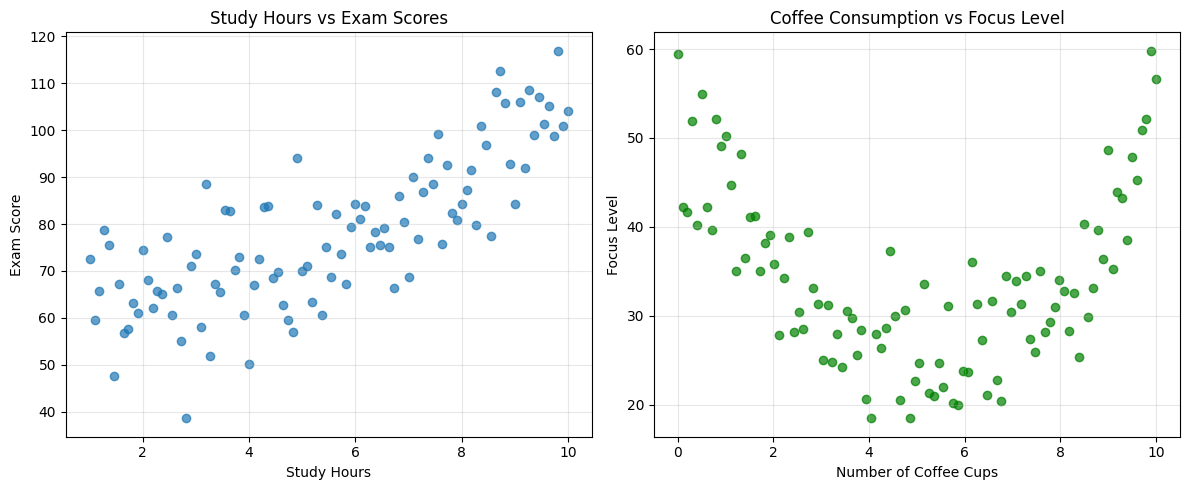

Pearson Correlation (Study Hours vs Exam Scores): 0.7735
Pearson Correlation (Coffee vs Focus): -0.0867
Spearman Correlation (Study Hours vs Exam Scores): 0.7775
Spearman Correlation (Coffee vs Focus): -0.1013

Mean Squared Error (MSE): 0.40
Mean Absolute Error (MAE): 0.52
R2 Score: 0.99
Regression Equation: Sales = 1.67 + 0.0290 × Advertising Cost


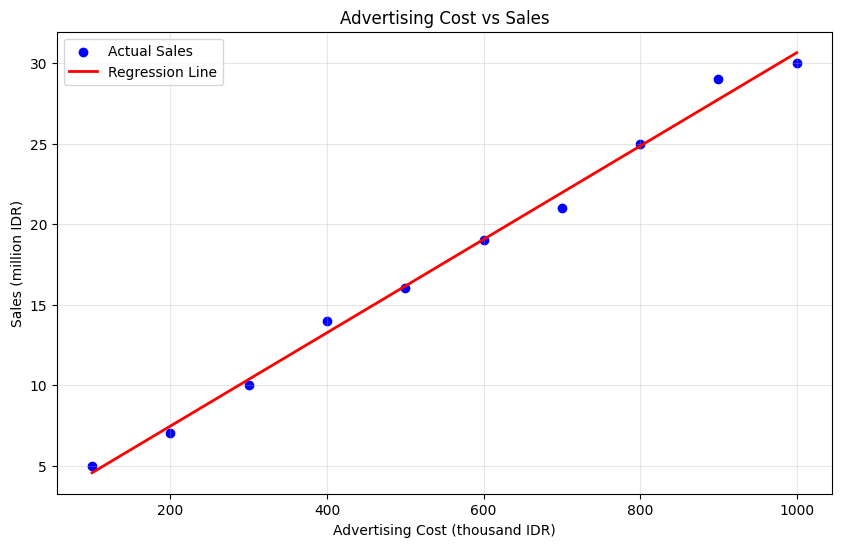

Root Mean Squared Error (RMSE): 0.6344
Coefficient of Determination (R²): 0.9942

Multiple Linear Regression Equation:
House Price = 316.28 + (1.17 × Size) + (-0.15 × Age) + (9.53 × Distance to City)
R² = 0.9965
Predicted house price for 180m², 5 years old, 10km away: 622.03 million IDR


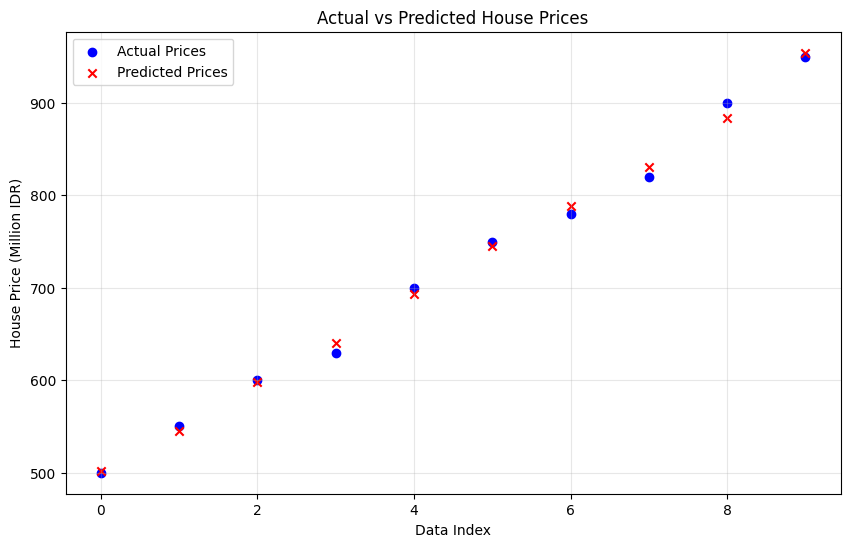

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Simulate study hours vs exam scores (linear)
np.random.seed(0)
study_hours = np.linspace(1, 10, 100)
exam_scores = 50 + 5 * study_hours + np.random.normal(0, 10, 100)

# Simulate coffee consumption vs focus level (non-linear)
coffee_cups = np.linspace(0, 10, 100)
focus_level = 1 * (coffee_cups - 5)**2 + 25 + np.random.normal(0, 5, 100)

#Plot both datasets
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(study_hours, exam_scores, alpha=0.7)
plt.title('Study Hours vs Exam Scores')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(coffee_cups, focus_level, alpha=0.7, color='green')
plt.title('Coffee Consumption vs Focus Level')
plt.xlabel('Number of Coffee Cups')
plt.ylabel('Focus Level')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation analysis
pearson_study = stats.pearsonr(study_hours, exam_scores)[0]
pearson_coffee = stats.pearsonr(coffee_cups, focus_level)[0]
spearman_study = stats.spearmanr(study_hours, exam_scores)[0]
spearman_coffee = stats.spearmanr(coffee_cups, focus_level)[0]

print(f"Pearson Correlation (Study Hours vs Exam Scores): {pearson_study:.4f}")
print(f"Pearson Correlation (Coffee vs Focus): {pearson_coffee:.4f}")
print(f"Spearman Correlation (Study Hours vs Exam Scores): {spearman_study:.4f}")
print(f"Spearman Correlation (Coffee vs Focus): {spearman_coffee:.4f}")

# Simple Linear Regression: Ad Cost vs Sales
ad_cost = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]).reshape(-1, 1)
sales = np.array([5, 7, 10, 14, 16, 19, 21, 25, 29, 30])

model = LinearRegression()
model.fit(ad_cost, sales)
sales_pred = model.predict(ad_cost)

mse = mean_squared_error(sales, sales_pred)
mae = mean_absolute_error(sales, sales_pred)
r2 = r2_score(sales, sales_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

intercept = model.intercept_
slope = model.coef_[0]

print(f"Regression Equation: Sales = {intercept:.2f} + {slope:.4f} × Advertising Cost")

plt.figure(figsize=(10, 6))
plt.scatter(ad_cost, sales, color='blue', label='Actual Sales')
plt.plot(ad_cost, sales_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Advertising Cost vs Sales')
plt.xlabel('Advertising Cost (thousand IDR)')
plt.ylabel('Sales (million IDR)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Coefficient of Determination (R²): {r2:.4f}")

# Multiple Linear Regression: House Prices
house_size = np.array([120, 140, 160, 180, 200, 220, 240, 260, 280, 300])
house_age = np.array([20, 15, 10, 8, 5, 3, 2, 1, 0, 0])
distance_to_city = np.array([5, 7, 10, 12, 15, 18, 20, 22, 25, 30])
house_price = np.array([500, 550, 600, 630, 700, 750, 780, 820, 900, 950])

X = np.column_stack((house_size, house_age, distance_to_city))
y = house_price

multi_model = LinearRegression()
multi_model.fit(X, y)
intercept_multi = multi_model.intercept_
coefs_multi = multi_model.coef_
r2_multi = r2_score(y, multi_model.predict(X))

print("\nMultiple Linear Regression Equation:")
print(f"House Price = {intercept_multi:.2f} + ({coefs_multi[0]:.2f} × Size) + ({coefs_multi[1]:.2f} × Age) + ({coefs_multi[2]:.2f} × Distance to City)")
print(f"R² = {r2_multi:.4f}")

#predict new house
new_house = np.array([[180, 5, 10]])
predicted_price = multi_model.predict(new_house)[0]
print(f"Predicted house price for 180m², 5 years old, 10km away: {predicted_price:.2f} million IDR")

#plot actual vs predicted
y_pred_multi = multi_model.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, label='Actual Prices', color='blue')
plt.scatter(range(len(y_pred_multi)), y_pred_multi, label='Predicted Prices', color='red', marker='x')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Data Index')
plt.ylabel('House Price (Million IDR)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
